# Titanic Jupyter Notebooks Project

## Problem Description

The sinking of the RMS Titanic is considered as the most infamous disaster in history. On the day of April 15th, 1912, during her maiden voyage, the Titanic struck an iceberg and sank soon after. Killing 1502 passengers and crew. 

Although the main reason that led to such incredible loss of life was the lack of enough lifeboats onboard the Titanic. There are definitely other factors that could affect one's likelyhood to survive, such as women, children and passengers who could afford upper-class tickets.

The application aims to perform the analysis of what kinds of passengers were more likely to survive. Particularly this application makes use of machine learning tools and algorithm to predict which passengers could survive the shipwreck.


## Step 1 Get The Data

The data has been pre downloaded and placed in the datasets directory.

In [1]:
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


In [2]:
DATA_PATH = "datasets"

def load_titanic_training_data(path=DATA_PATH):
    csv_path = os.path.join(path, "train.csv")
    return pd.read_csv(csv_path)
def load_titanic_test_data(path=DATA_PATH):
    csv_path = os.path.join(path, "test.csv")
    return pd.read_csv(csv_path)

### Now let's look at the data

In [3]:
titanic = load_titanic_training_data()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Each row represents one passenger. There are 10 attributes(columns). 
- Survived: Survival, 0 = No, 1 = Yes; 
- Pclass: Ticket class, 1 = first class, 2 = second class, 3 = third class; 
- Sex: sex; 
- Age: age; 
- SibSp: # of sibilings / spouse aboard; 
- Parch: # of parents / children aboard; 
- Ticket: ticket number; 
- Fare: passenger fare; 
- Cabin: Cabin number; 
- Embarked: port of embarkation, C = Cherbourg, Q = Queenstown, S = Southampton.

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
titanic["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


## Few points to note here:

- Around 38% samples survived representative of the actual historical survival rate of 32%.
- Most passengers (> 75%) did not travel with parents or children.
- There are very few elderly passengers within age of 65 and 80
- We can observe the correlation between passenger class 1 and survived, this will be included in the model                          
- We confirm the observation that female had a significant higher survival rate than male, this will be included in the model

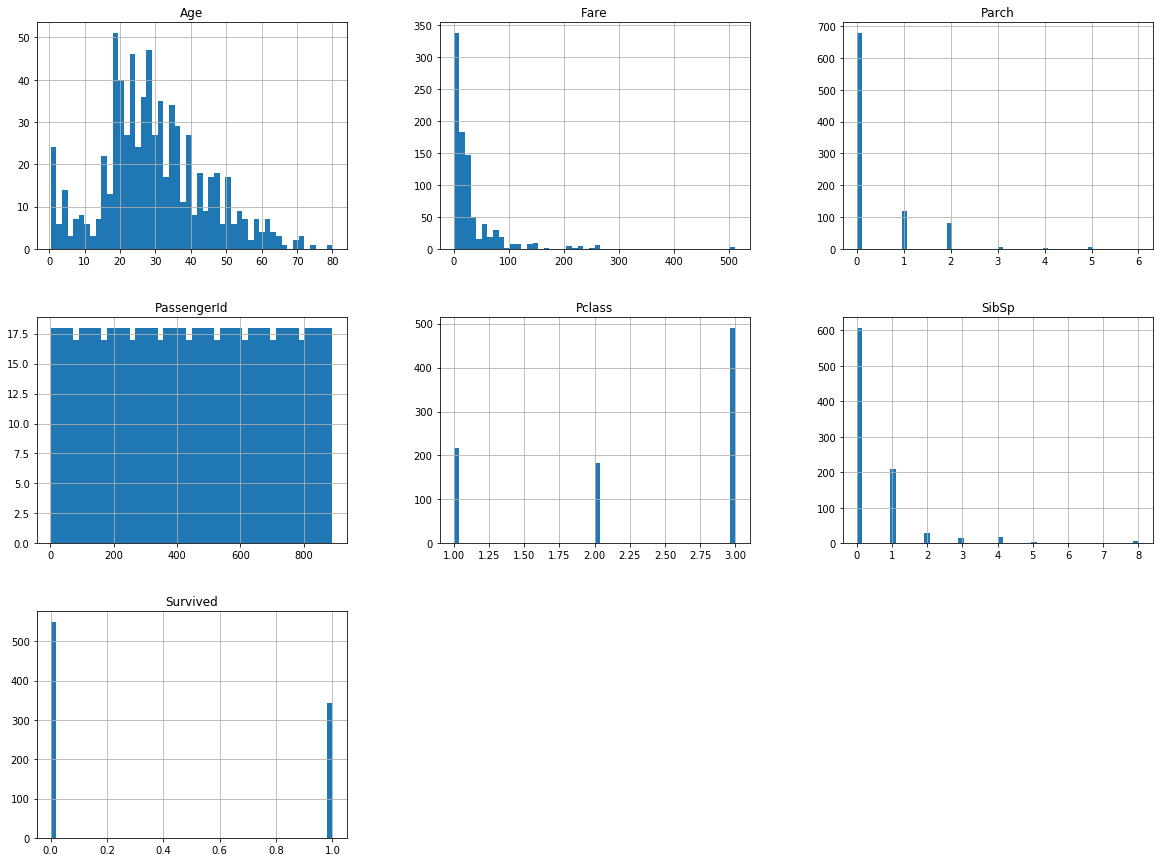

In [11]:
%matplotlib inline
titanic.hist(bins=50, figsize=(20,15))
plt.show()

### Correlations

In [12]:
corr_matrix = titanic.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Ok some things to note here. 
* It seems like a higher fare corelates with a higher chance of survival but class has the oposite affect. This would be becuase lower classes like first class were better than third. 
* Having children or parents seemed to help your odds.
* PasengerID has no correlation really.
* Age and having siblings had a slight negative correlation.

### Let's try to focus on some attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fefc4e588>,
      dtype=object)

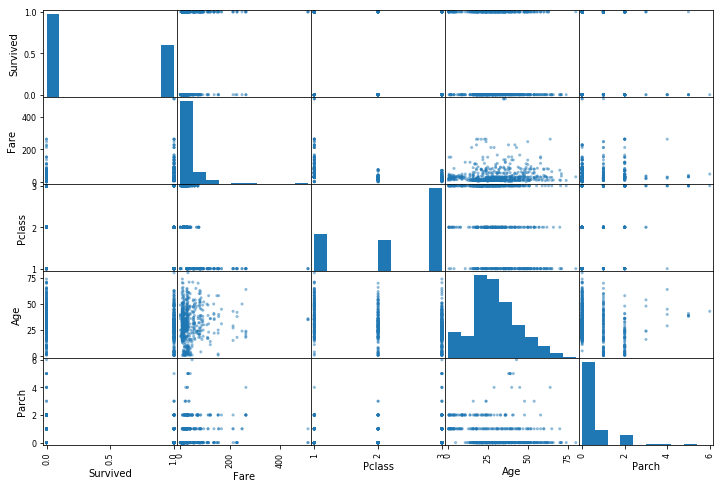

In [13]:
attributes = ["Survived", "Fare", "Pclass", "Age", "Parch"]

scatter_matrix(titanic[attributes], figsize=(12,8))

### This shows some results:
* Lower Class numbers are acociated with higher fares.
* Class 2/3 seemed to lean younger than Class 1.
* Fare and Class are not as tightly coupled as expected.

### More investigation into correlations needed

In [14]:
corr_matrix["Pclass"].sort_values(ascending=False)

Pclass         1.000000
SibSp          0.083081
Parch          0.018443
PassengerId   -0.035144
Survived      -0.338481
Age           -0.369226
Fare          -0.549500
Name: Pclass, dtype: float64

In [15]:
corr_matrix["Fare"].sort_values(ascending=False)

Fare           1.000000
Survived       0.257307
Parch          0.216225
SibSp          0.159651
Age            0.096067
PassengerId    0.012658
Pclass        -0.549500
Name: Fare, dtype: float64

In [16]:
corr_matrix["Age"].sort_values(ascending=False)

Age            1.000000
Fare           0.096067
PassengerId    0.036847
Survived      -0.077221
Parch         -0.189119
SibSp         -0.308247
Pclass        -0.369226
Name: Age, dtype: float64

In [17]:
corr_matrix["Parch"].sort_values(ascending=False)

Parch          1.000000
SibSp          0.414838
Fare           0.216225
Survived       0.081629
Pclass         0.018443
PassengerId   -0.001652
Age           -0.189119
Name: Parch, dtype: float64

I wonder how these new factors coorelate.

In [18]:
corr_matrix = titanic.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

So having a cabin meant paying more, but any one from any class could have a cabin.

It seems that Fare is coorealated with Class and Age is negatively coorelated with Class but not very correlated with Fare. I suspect that this has to do with Fares for children being less than adults regardless of class.

## Step 2 Data Prep


It's going to be assumed that PassengerId, Name and Embarked have nothing to offer to our model. 
Ticket fare feature is dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
Cabin feature is dropped as it is highly incomplete and contains many null values both in both data sets

We want to complete Age feature as it is definitely correlated to survival. Null age cells would be given the mean value of the sample.

We takes advantage of the pipeline library support, data cleaner will drop un used columns and binarize features like Sex.

Imputer will locate null values and replace them with median value of the sample. 

Standard scaler will apply feature scaling by removing the mean value and scaling to unit variance.

In [19]:
def clean_data(original):
    data = original.copy()
    data = data.drop(columns=["PassengerId", "Survived", "Name", "Ticket", "Cabin", "Embarked"])
    ##data["HasCabin"] = data["Cabin"].apply(lambda x: 1 if isinstance(x, str) == True else 0)
    ##data = data.drop("Cabin", axis=1)
    data["IsMale"] = data["Sex"].apply(lambda x: 1 if x == "male" else 0)
    data = data.drop("Sex", axis=1)
    data['Age'].fillna(value=data['Age'].mean(), inplace=True)
    return data

def clean_test_data(original):
    data = original.copy()
    data = data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin", "Embarked"])
    ##data["HasCabin"] = data["Cabin"].apply(lambda x: 1 if isinstance(x, str) == True else 0)
    ##data = data.drop("Cabin", axis=1)
    data["IsMale"] = data["Sex"].apply(lambda x: 1 if x == "male" else 0)
    data = data.drop("Sex", axis=1)
    data['Age'].fillna(value=data['Age'].mean(), inplace=True)
    return data 

def get_clean_data():
    data = load_titanic_training_data()
    return clean_data(data)
    

train = get_clean_data()
train.head()
    
    

,Pclass,Age,SibSp,Parch,Fare,IsMale
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


### Pipelines

In [20]:
class TitanicDataFramePipe(BaseEstimator, TransformerMixin):
    def __init__(self):
        return
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return clean_data(X).values
    
class TitanicTestDataFramePipe(BaseEstimator, TransformerMixin):
    def __init__(self):
        return
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return clean_test_data(X).values

In [21]:
pipeline = Pipeline([
    ('cleaner', TitanicDataFramePipe()),
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

test_pipeline = Pipeline([
    ('cleaner', TitanicTestDataFramePipe()),
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

titanic_train = load_titanic_training_data()
test = load_titanic_test_data()
test_t = test_pipeline.fit_transform(test)
prepared = pipeline.fit_transform(titanic_train)

In [22]:
def get_labels(original):
    return original["Survived"].copy()

labels = get_labels(titanic)

## Step 3 Model Training

Now that we have acquired, analyzed and prepared the data, we can move on to training data models and predicting the solutions. 

### Naive Bayes Classifier

In [23]:

gnb = GaussianNB()
gnb.fit(prepared, labels)
predictions = gnb.predict(prepared)

print(confusion_matrix(labels, predictions))
print(classification_report(labels, predictions))
print(accuracy_score(labels, predictions))


[[465  84]
 [101 241]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       549
           1       0.74      0.70      0.72       342

   micro avg       0.79      0.79      0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891

0.792368125701459


In [24]:
predictions = gnb.predict(test_t)

test_final = test.copy()[['PassengerId']]
test_final['Survived'] = predictions
test_final.to_csv('titanic_gnb_prediction.csv', index=False)
test_final.head(15)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


When these predictions were submitted to Kaggle they reieved a score of 0.75199.
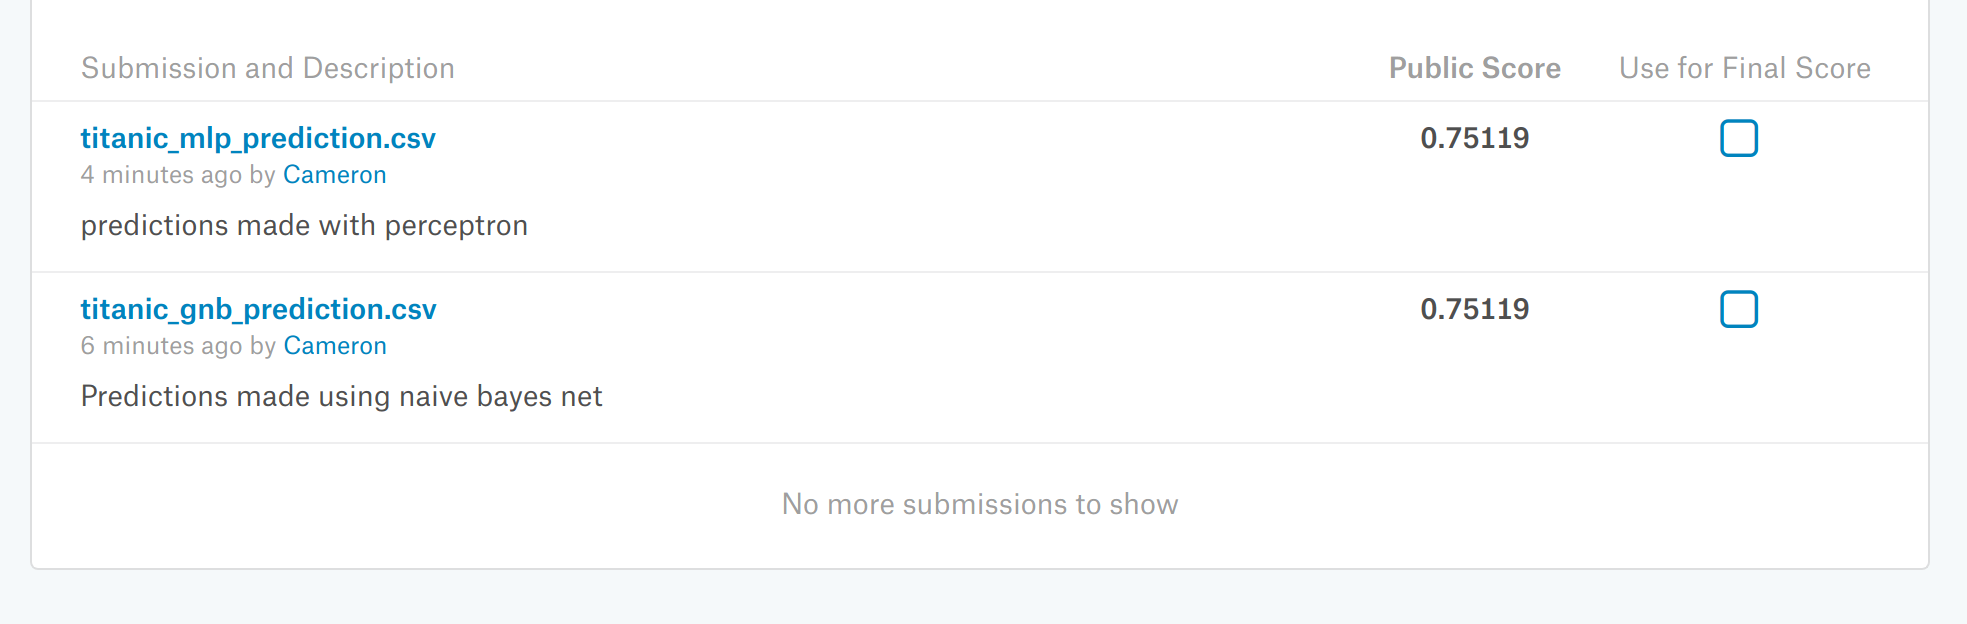

### Perceptron

In [25]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
predictions = clf.fit(prepared, labels).predict(prepared)

print(confusion_matrix(labels, predictions))
print(classification_report(labels, predictions))
print(accuracy_score(labels, predictions))

[[514  35]
 [124 218]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       549
           1       0.86      0.64      0.73       342

   micro avg       0.82      0.82      0.82       891
   macro avg       0.83      0.79      0.80       891
weighted avg       0.83      0.82      0.81       891

0.8215488215488216


In [26]:
predictions = clf.predict(test_t)

test_final = test.copy()[['PassengerId']]
test_final['Survived'] = predictions
test_final.to_csv('titanic_mlp_prediction.csv', index=False)
test_final.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


When these predictions were submitted to Kaggle they reieved a score of 0.75199.
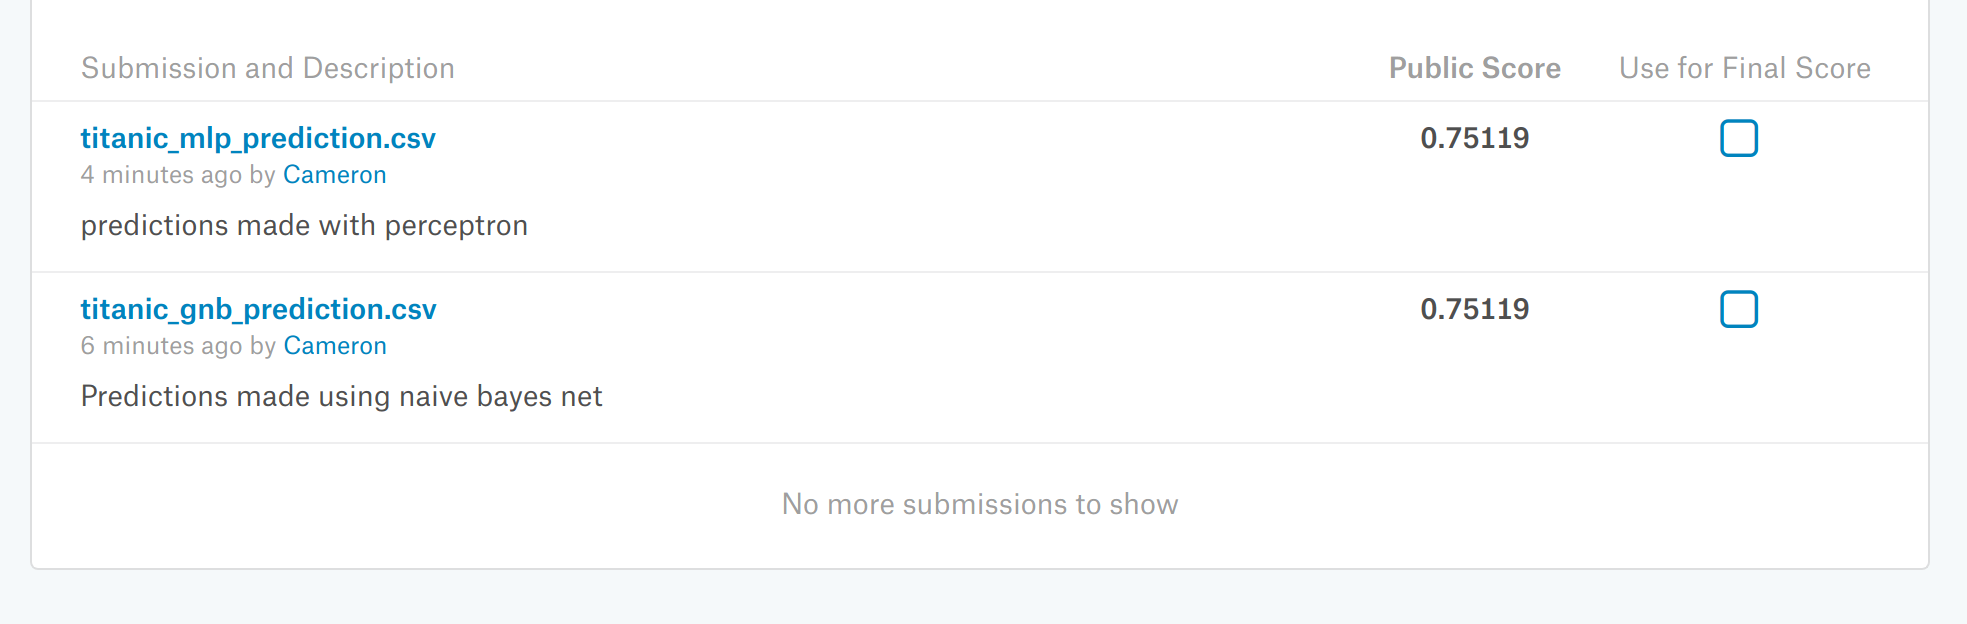

## Performance metrics

- accuracy score is the percentage of the correction predictions that the training model produced.
- recall is the fraction of relevant instances that have been retrieved over the total amount of relevant instances.
- precision is the fraction of relevant instances among the retrieved instances.
- f1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.
- confusion matrix is a table that is often used to describe the performance of a classification model. The four basic terms are true positives, true negatives, false positives and false negatives.

## Closing Remarks

From our results, we can observe that Multi layer perceptron classifer achieved a slightly better result than naive bayes classifier due to less Type I and II errors and better accuracy score.

It is intresting that the scores for both classifiers was the exact same. However we were more than happy with a score of around 75%.